In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred
fred_key = ''

In [192]:
#plt.style.use('fivethirtyeight')
#pd.set_option('display.max_columns', 500)
#color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [193]:
#create fred object
fred = Fred(api_key=fred_key)

In [194]:
#search fred for econ data
sp_search = fred.search('S&P', order_by='popularity')

In [195]:
ids = ('WALCL','WTREGEN', 'RRPONTSYD', 'SP500')

In [196]:
all_results = []

for myid in ids:
    results = fred.get_series(series_id=myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    
df = pd.concat(all_results, axis=1)
#df = df.dropna()
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

In [197]:
df['NET_LIQ'] = (df.WALCL - df.WTREGEN * 1000 - df.RRPONTSYD * 1000)/(1000*1000)
df['SP_FV'] = df.SP500 - ((df.WALCL - df.WTREGEN * 1000 - df.RRPONTSYD * 1000)/1000/1.1-1625)
#SPX - ((FRED:WALCL-FRED:WTREGEN*1000-FRED:RRPONTSYD*1000)/1000/1.1-1625)

<AxesSubplot:>

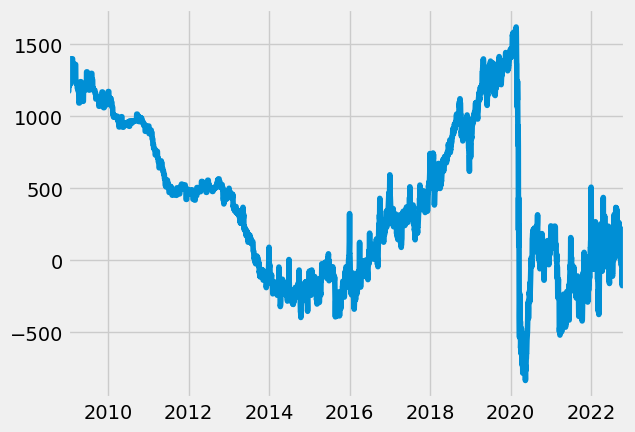

In [200]:
df.SP_FV.plot()

In [199]:
df = df[df.index > '2009-01-01'] #filter zeitraum 2020-10-31

In [202]:
df['NET_LIQ_pct'] = df['NET_LIQ'].pct_change()

<AxesSubplot:>

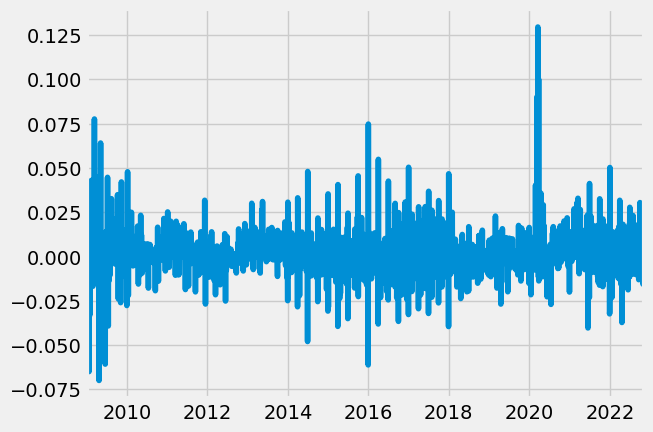

In [203]:
df['NET_LIQ_pct'].plot()

<AxesSubplot:>

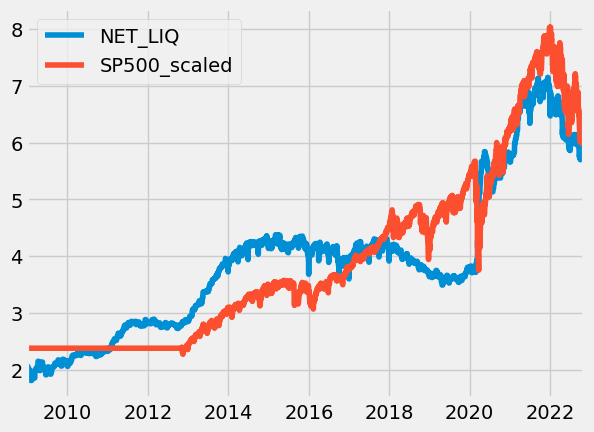

In [204]:
#df['SP500_scaled'] = df.SP500 / 650
df['SP500_scaled'] = df.SP500 / (df.SP500.mean()/df.NET_LIQ.mean())
df.plot(y=["NET_LIQ", "SP500_scaled"])
# print bar graph

In [206]:
df['SP500_scaled'].corr(df['NET_LIQ'].shift()) #shift 15 is best

0.9059659487284292

In [207]:
#https://www.youtube.com/watch?v=R67XuYc9NQ4&t=82s